## For reference, here we will be drawing a lollipop graph to understand base of code.

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

source vertex {target:length, }
0 {0: 0, 1: 1, 2: 1, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7} 
1 {1: 0, 0: 1, 2: 1, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7} 
2 {2: 0, 0: 1, 1: 1, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7} 
3 {3: 0, 0: 1, 1: 1, 2: 1, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6} 
4 {4: 0, 5: 1, 3: 1, 6: 2, 0: 2, 1: 2, 2: 2, 7: 3, 8: 4, 9: 5} 
5 {5: 0, 4: 1, 6: 1, 3: 2, 7: 2, 0: 3, 1: 3, 2: 3, 8: 3, 9: 4} 
6 {6: 0, 5: 1, 7: 1, 4: 2, 8: 2, 3: 3, 9: 3, 0: 4, 1: 4, 2: 4} 
7 {7: 0, 6: 1, 8: 1, 5: 2, 9: 2, 4: 3, 3: 4, 0: 5, 1: 5, 2: 5} 
8 {8: 0, 7: 1, 9: 1, 6: 2, 5: 3, 4: 4, 3: 5, 0: 6, 1: 6, 2: 6} 
9 {9: 0, 8: 1, 7: 2, 6: 3, 5: 4, 4: 5, 3: 6, 0: 7, 1: 7, 2: 7} 

average shortest path length 2.86

length #paths
0 10
1 24
2 16
3 14
4 12
5 10
6 8
7 6
radius: 4
diameter: 7
eccentricity: {0: 7, 1: 7, 2: 7, 3: 6, 4: 5, 5: 4, 6: 4, 7: 5, 8: 6, 9: 7}
center: [5, 6]
periphery: [0, 1, 2, 9]
density: 0.26666666666666666


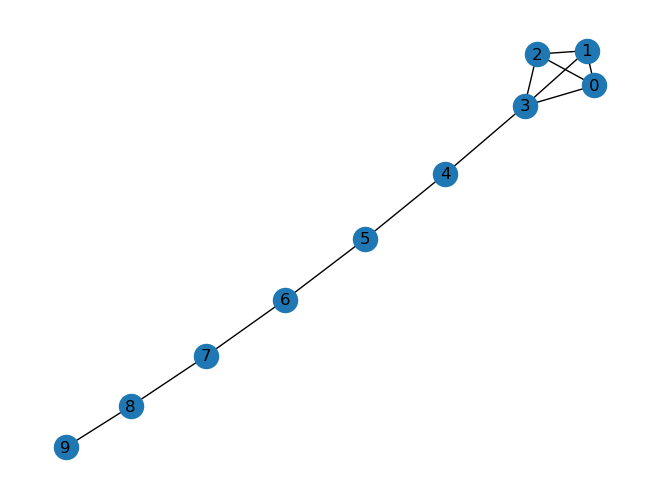

In [9]:
G = nx.lollipop_graph(4, 6)

pathlengths = []

print("source vertex {target:length, }")
for v in G.nodes():
    spl = nx.single_source_shortest_path_length(G, v) #calculates the shortest paths from node v to all other nodes.
    print(f"{v} {spl} ")
    for p in spl:
        pathlengths.append(spl[p])

print()
print(f"average shortest path length {sum(pathlengths) / len(pathlengths)}")

# histogram of path lengths
dist = {}
for p in pathlengths:
    if p in dist:
        dist[p] += 1
    else:
        dist[p] = 1

print()
print("length #paths")
verts = dist.keys()
for d in sorted(verts):
    print(f"{d} {dist[d]}")

print(f"radius: {nx.radius(G)}")
print(f"diameter: {nx.diameter(G)}")
print(f"eccentricity: {nx.eccentricity(G)}")  #A dictionary showing the greatest distance from each node to any other node.
print(f"center: {nx.center(G)}")  #The set of nodes with the minimum eccentricity.
print(f"periphery: {nx.periphery(G)}") # The set of nodes with the maximum eccentricity.
print(f"density: {nx.density(G)}") #The ratio of actual edges to possible edges in the graph.

pos = nx.spring_layout(G, seed=3068)  # Seed layout for reproducibility
nx.draw(G, pos=pos, with_labels=True)
plt.show()